In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from google.colab import files

df_ODI = pd.read_csv("/content/ODI.csv")
df_IPL = pd.read_csv("/content/IPL.csv")
df_Test = pd.read_csv("/content/Test.csv")
df_T20 = pd.read_csv("/content/T20.csv")


sns.set_style("whitegrid")


<ipython-input-20-c26d8da4c096>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='runs_scored', y='player_name', data=top_10, palette='viridis')


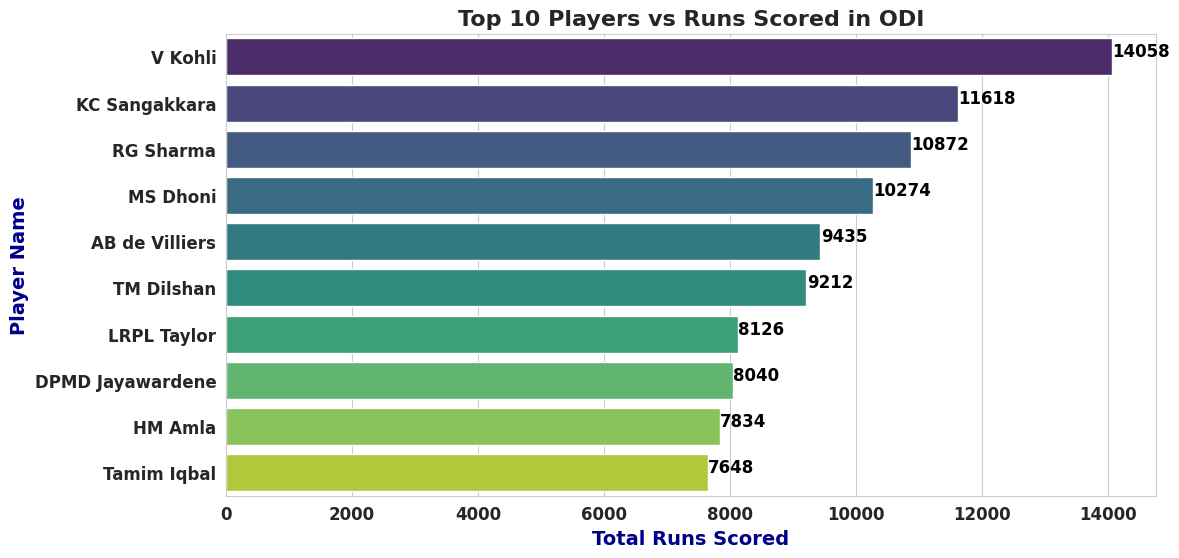

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'runs_scored' in df_ODI.columns and 'player_name' in df_ODI.columns:
    player_runs = df_ODI.groupby('player_name', as_index=False)['runs_scored'].sum()
    top_10 = player_runs.nlargest(10, 'runs_scored')

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='runs_scored', y='player_name', data=top_10, palette='viridis')

    for index, value in enumerate(top_10['runs_scored']):
        ax.text(value + 5, index, str(value), color='black', ha='left', fontsize=12, fontweight='bold')

    plt.title('Top 10 Players vs Runs Scored in ODI', fontsize=16, fontweight='bold')
    plt.xlabel('Total Runs Scored', fontsize=14, fontweight='bold', color='#00008B')
    plt.ylabel('Player Name', fontsize=14, fontweight='bold', color='#00008B')

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.show()
else:
    print("Ensure 'player_name' and 'runs_scored' columns exist in df_ODI.")


Aggregated data for Team India (total runs, matches played, avg runs per match):
      Year  total_runs  matches_played  avg_runs_per_match
0  2016.0        1576               8          197.000000
1  2017.0       11086              47          235.872340
2  2018.0        6251              26          240.423077
3  2019.0        8824              38          232.210526
4  2020.0        2603               9          289.222222
5  2021.0        2502              11          227.454545
6  2022.0        1574               7          224.857143


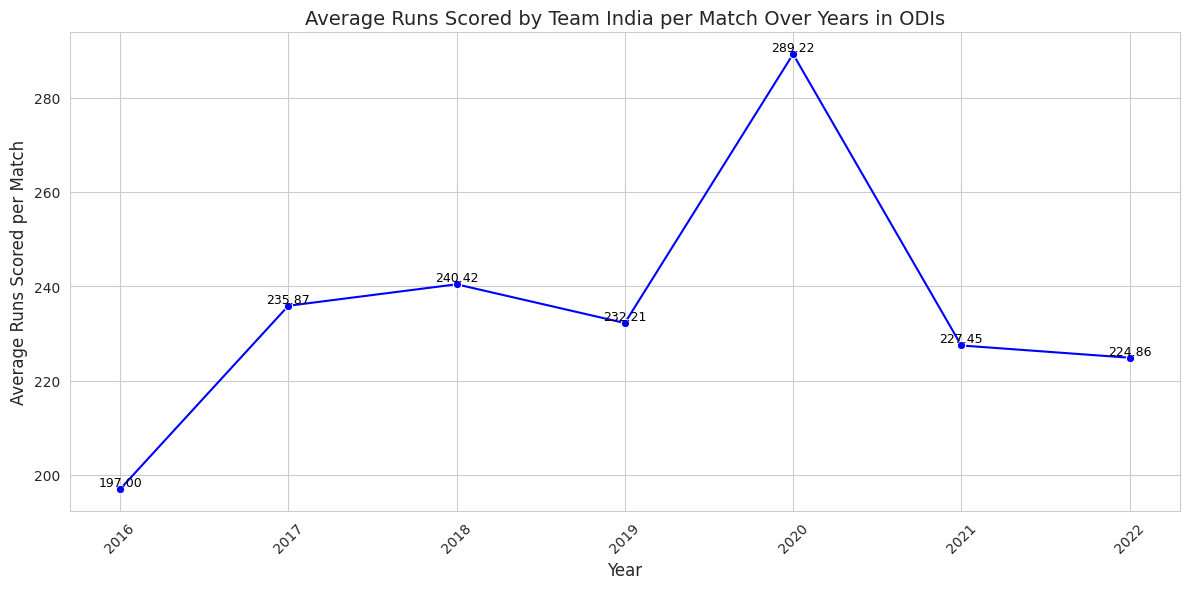

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

india_data = df_ODI[df_ODI['team_name'] == 'India']

yearly_stats = india_data.groupby('Year').agg(
    total_runs=('runs_scored', 'sum'),
    matches_played=('match_date', 'nunique')
).reset_index()a

yearly_stats['avg_runs_per_match'] = yearly_stats['total_runs'] / yearly_stats['matches_played']

print("Aggregated data for Team India (total runs, matches played, avg runs per match):\n", yearly_stats)

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x='Year', y='avg_runs_per_match', marker='o', color='b')

for index, row in yearly_stats.iterrows():
    plt.text(row['Year'], row['avg_runs_per_match'], f"{row['avg_runs_per_match']:.2f}", color='black', ha='center', fontsize=9, verticalalignment='bottom')

plt.title('Average Runs Scored by Team India per Match Over Years in ODIs', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Runs Scored per Match', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

save_path = "/content/team_india_avg_runs_per_match_yearly_graph.png"
plt.savefig(save_path, dpi=300)

plt.show()

files.download(save_path)



Rajasthan Royals Wins: 12951
Rajasthan Royals Losses: 13291


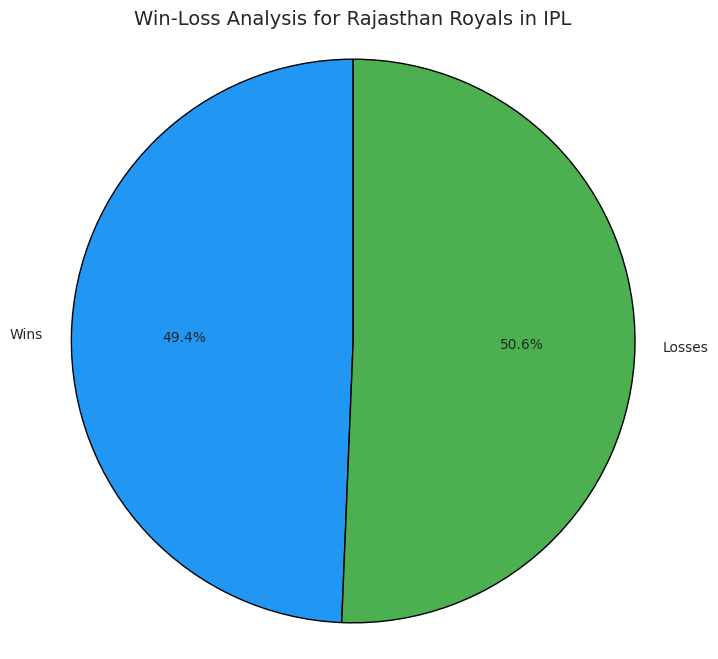

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

data = df_IPL[df_IPL['team_name'] == 'Rajasthan Royals']

wins = data[data['result'] == 'Rajasthan Royals']['result'].count()

losses = data[data['result'] != 'Rajasthan Royals']['result'].count()

print(f"Rajasthan Royals Wins: {wins}")
print(f"Rajasthan Royals Losses: {losses}")

win_loss_data = [wins, losses]
labels = ['Wins', 'Losses']
colors = ['#2196F3', '#4CAF50']

plt.figure(figsize=(8, 8))
plt.pie(win_loss_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Win-Loss Analysis for Rajasthan Royals in IPL', fontsize=14)
plt.axis('equal')

save_path = "/content/rajasthan_royals_win_loss_pie_chart.png"
plt.savefig(save_path, dpi=300)

plt.show()

from google.colab import files
files.download(save_path)


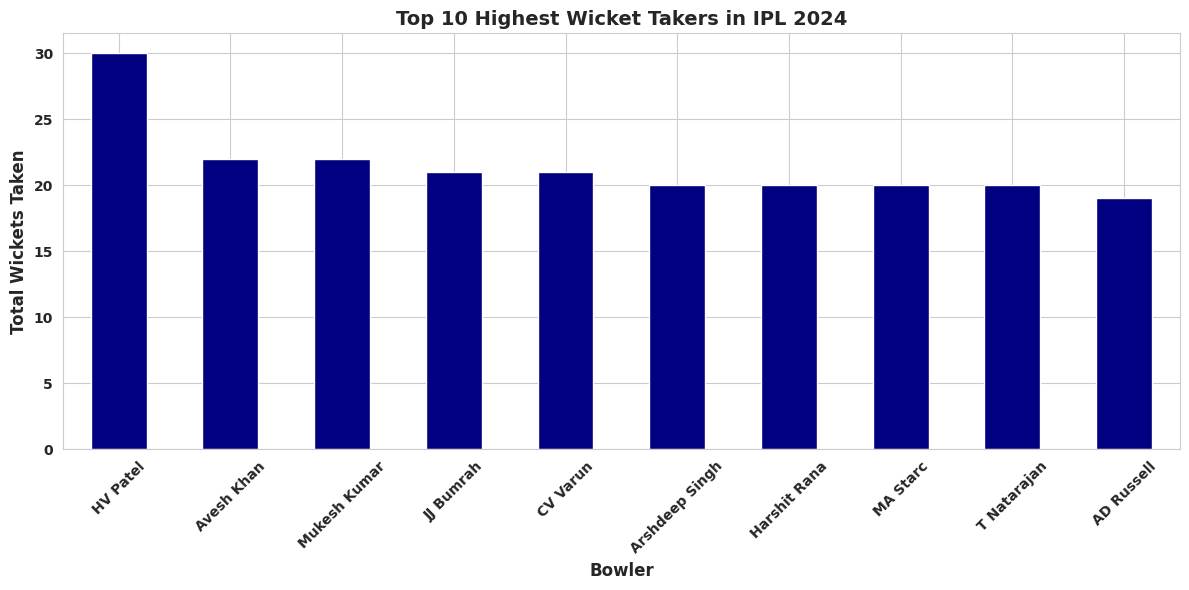

In [ ]:
import matplotlib.pyplot as plt

bowler_data_2024 = df_IPL[df_IPL['Year'] == 2024]
bowler_wickets = bowler_data_2024.groupby('bowler')['wickets_taken'].sum()
top_10_bowlers = bowler_wickets.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

top_10_bowlers.plot(kind='bar', color='navy')

plt.title('Top 10 Highest Wicket Takers in IPL 2024', fontsize=14, fontweight='bold')
plt.xlabel('Bowler', fontsize=12, fontweight='bold')
plt.ylabel('Total Wickets Taken', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.show()


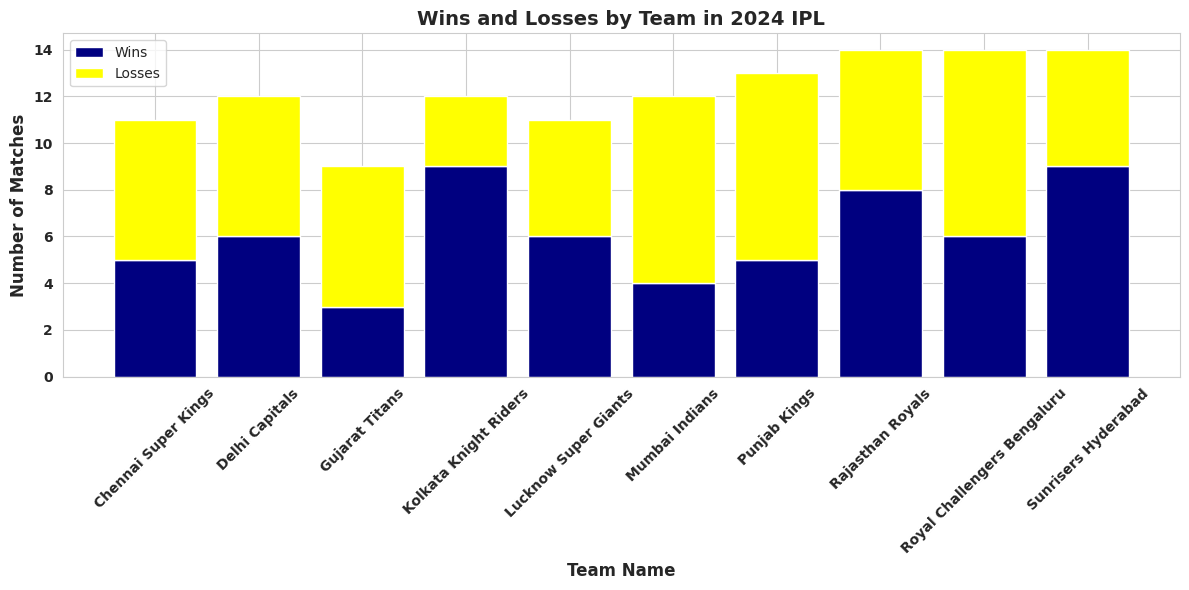

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_2024 = df_IPL[df_IPL['Year'] == 2024]

unique_matches = df_2024.drop_duplicates(subset=['match_date'])

wins_data = unique_matches['winning_team'].value_counts().reset_index()
wins_data.columns = ['team_name', 'wins']

losses_data = unique_matches[unique_matches['losing_team'].notnull()]
losses_data = losses_data['losing_team'].value_counts().reset_index()
losses_data.columns = ['team_name', 'losses']

merged_data = pd.merge(wins_data, losses_data, on='team_name', how='outer').fillna(0)

plt.figure(figsize=(12, 6))
plt.bar(merged_data['team_name'], merged_data['wins'], label='Wins', color='navy')
plt.bar(merged_data['team_name'], merged_data['losses'], label='Losses', bottom=merged_data['wins'], color='yellow')

plt.title('Wins and Losses by Team in 2024 IPL', fontsize=14, fontweight='bold')
plt.xlabel('Team Name', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Number of Matches', fontsize=12, fontweight='bold', color='darkblue')

plt.xticks(rotation=45, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

df_since_2016 = df_T20[(df_T20['Year'] >= 2016) & (df_T20['team_name'] == 'India')]
df_grouped = df_since_2016.groupby('player_name').agg({'balls_faced': 'sum', 'runs_scored': 'sum'}).reset_index()
top_scorers = df_grouped.nlargest(10, 'runs_scored')

fig = px.scatter(top_scorers, x='balls_faced', y='runs_scored', color='player_name',
                 title='Top 10 Run Scorers for Team India in T20 (Since 2016)',
                 labels={'balls_faced': 'Total Balls Faced', 'runs_scored': 'Total Runs Scored', 'player_name': 'Player Name'},
                 hover_data={'player_name': True}, size_max=20)

fig.update_traces(marker=dict(size=15))
fig.update_layout(
    font=dict(size=14, family="Arial", color="black"),
    xaxis=dict(title_font=dict(size=16, family="Arial", color="black", weight="bold"),
               tickfont=dict(size=14, family="Arial", color="black", weight="bold")),
    yaxis=dict(title_font=dict(size=16, family="Arial", color="black", weight="bold"),
               tickfont=dict(size=14, family="Arial", color="black", weight="bold")),
    legend_title=dict(text='Player Name', font=dict(size=16, family="Arial", color="black", weight="bold"))
)


html_save_path = "/content/top_10_run_scorers_india_2016.html"
fig.write_html(html_save_path)


files.download(html_save_path)

fig.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

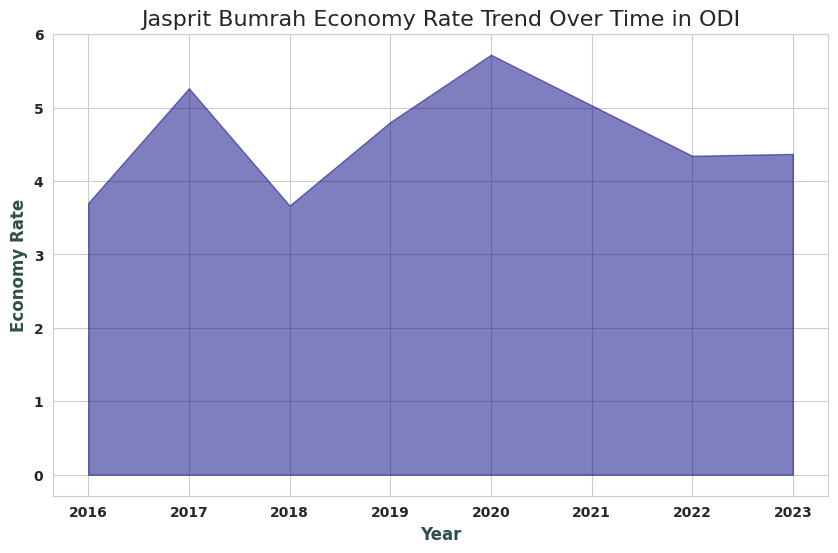

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

bumrah_data = df_ODI[df_ODI['bowler'] == 'JJ Bumrah']
economy_by_year = bumrah_data.groupby('Year')['bowler_economy'].mean()

plt.figure(figsize=(10, 6))
plt.fill_between(economy_by_year.index, economy_by_year.values, color='navy', alpha=0.5)
plt.title('Jasprit Bumrah Economy Rate Trend Over Time in ODI', fontsize=16)
plt.xlabel('Year', fontsize=12, color='darkslategray', fontweight='bold')
plt.ylabel('Economy Rate', fontsize=12, color='darkslategray', fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


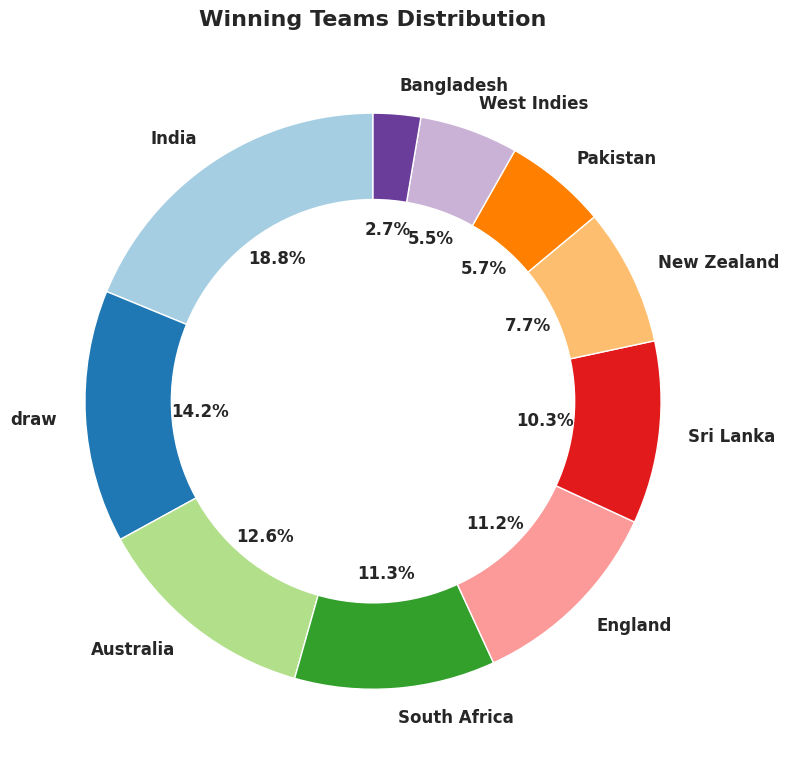

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

winning_team_counts = df_Test['winning_team'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    winning_team_counts,
    labels=winning_team_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

for autotext in autotexts:
    autotext.set_fontweight('bold')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')

plt.title('Winning Teams Distribution', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


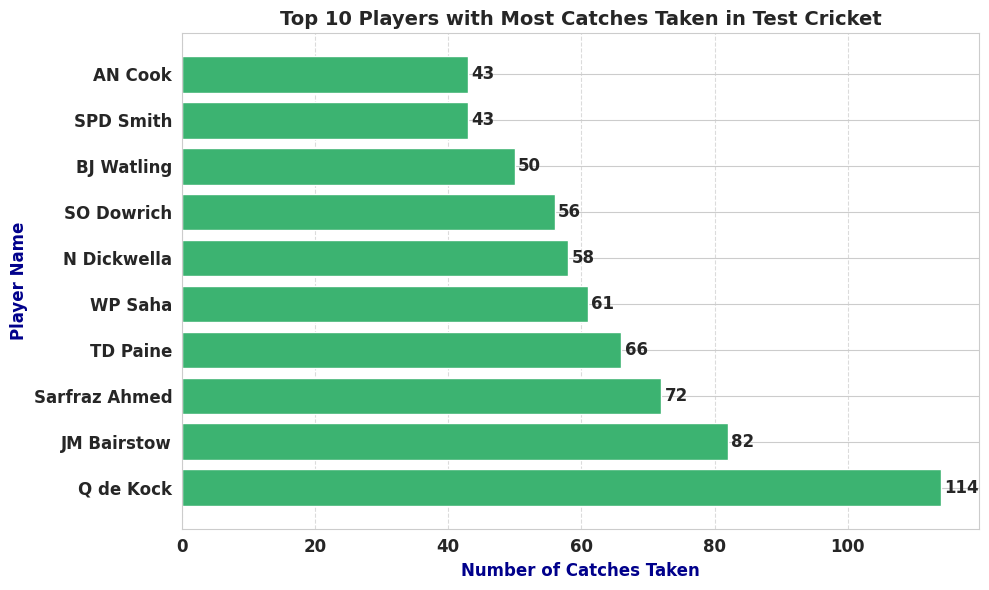

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

caught_dismissals = df_Test[df_Test['dismissal_kind'] == 'caught']
catches_taken = caught_dismissals['dismissal_fielders'].value_counts().reset_index()
catches_taken.columns = ['player_name', 'number_of_catches']
top_10_catches = catches_taken.nlargest(10, 'number_of_catches')

players = top_10_catches['player_name']
number_of_catches = top_10_catches['number_of_catches']

plt.figure(figsize=(10, 6))
bars = plt.barh(players, number_of_catches, color='mediumseagreen')

for bar, value in zip(bars, number_of_catches):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             str(value), fontsize=12, fontweight='bold', va='center', ha='left')

plt.xlabel('Number of Catches Taken', fontsize=12, fontweight='bold', color='#00008B')
plt.ylabel('Player Name', fontsize=12, fontweight='bold', color='#00008B')
plt.title('Top 10 Players with Most Catches Taken in Test Cricket', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

bowler_stats = df_IPL.groupby("bowler")[["wickets_taken", "balls_bowled"]].sum().reset_index()
bowler_stats["overs_bowled"] = (bowler_stats["balls_bowled"] // 6)
top_10_bowlers = bowler_stats.nlargest(10, "wickets_taken")

fig = go.Figure(data=[go.Scatter3d(
    x=top_10_bowlers["bowler"],
    y=top_10_bowlers["wickets_taken"],
    z=top_10_bowlers["overs_bowled"],
    mode='markers',
    marker=dict(size=10, color=top_10_bowlers["wickets_taken"], colorscale="Viridis"),
)])

fig.update_layout(
    title="3D Scatter Plot of Wickets and Overs Bowled by Top 10 Bowlers in IPL",
    scene=dict(
        xaxis_title='Bowler',
        yaxis_title='Wickets',
        zaxis_title='Overs Bowled'
    )
)

html_save_path = "/content/top_10_bowlers_scatter_plot.html"
fig.write_html(html_save_path)

files.download(html_save_path)

fig.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>